<a href="https://colab.research.google.com/github/fani-01/Employee_salary_loan_app-using-machine-learning/blob/main/Employee_prediction_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
import joblib


In [42]:
from google.colab import files
uploaded = files.upload()


Saving adult 3.csv to adult 3 (2).csv


In [43]:
import pandas as pd

df = pd.read_csv('/content/adult 3.csv')

df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [44]:
print(df.columns.tolist())


['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [45]:
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')


In [46]:
from sklearn.preprocessing import LabelEncoder

le_income = LabelEncoder()
df['income'] = le_income.fit_transform(df['income'])


In [47]:
df['loan_eligible'] = ((df['income'] == 1) & (df['hours_per_week'] > 30)).astype(int)


In [48]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [49]:
features = df.columns.tolist()
features.remove('income')
features.remove('loan_eligible')

X = df[features]
y_salary = df['income']
y_loan = df['loan_eligible']


In [50]:
features = ['age', 'educational_num', 'hours_per_week', 'capital_gain', 'capital_loss', 'fnlwgt']
X = df[features]

In [51]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_salary, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_loan, test_size=0.2, random_state=42)


In [52]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

y_pred_salary = regressor.predict(X_test_reg)
print("R2 Score:", r2_score(y_test_reg, y_pred_salary))
print("MSE:", mean_squared_error(y_test_reg, y_pred_salary))


R2 Score: 0.2758200011349944
MSE: 0.12996467413906812


In [53]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_clf, y_train_clf)

y_pred_loan = classifier.predict(X_test_clf)
print("Accuracy:", accuracy_score(y_test_clf, y_pred_loan))
print(classification_report(y_test_clf, y_pred_loan))


Accuracy: 0.8171767837035521
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7566
           1       0.61      0.53      0.57      2203

    accuracy                           0.82      9769
   macro avg       0.74      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769



In [54]:
import joblib

joblib.dump(regressor, 'salary_model.pkl')
joblib.dump(classifier, 'loan_model.pkl')


['loan_model.pkl']

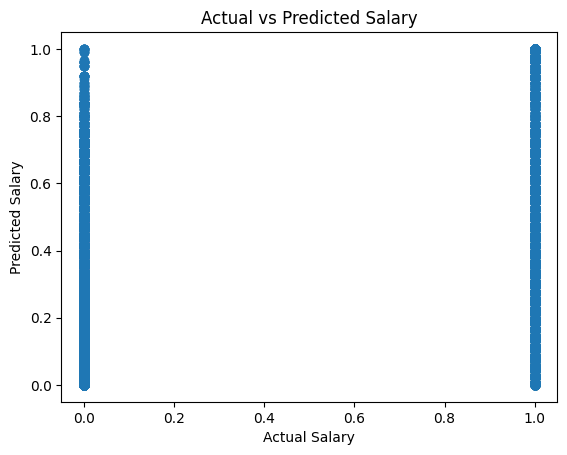

In [55]:
import matplotlib.pyplot as plt

plt.scatter(y_test_reg, y_pred_salary)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

In [56]:
print(df['income'].unique())


[0 1]


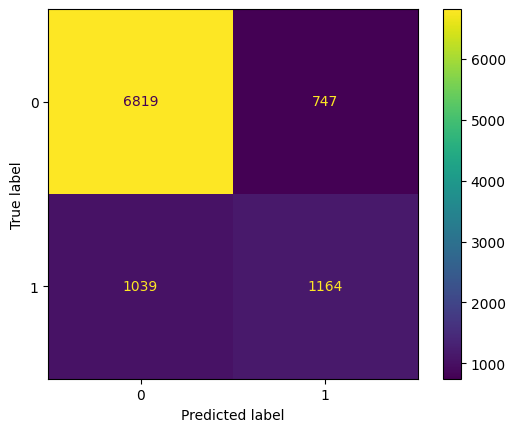

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_clf, y_pred_loan)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [58]:
df['salary'] = ... # some actual salary column
y_salary = df['salary']


In [59]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test_clf, y_pred_loan))
print(classification_report(y_test_clf, y_pred_loan))

Accuracy: 0.8171767837035521
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7566
           1       0.61      0.53      0.57      2203

    accuracy                           0.82      9769
   macro avg       0.74      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769



In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier, X, y_loan, cv=5).mean()

np.float64(0.8175545183836718)

In [61]:
import joblib

# Save your classification model
joblib.dump(classifier, 'loan_model.pkl')

# If you have a separate salary prediction model:
joblib.dump(regressor, 'salary_model.pkl')

['salary_model.pkl']

In [62]:
%%writefile app.py
from flask import Flask, request, render_template
import joblib

app = Flask(__name__)

loan_model = joblib.load('loan_model.pkl')
salary_model = joblib.load('salary_model.pkl')

@app.route('/')
def home():
    return '''
    <h2>Loan and Salary Prediction</h2>
    <form action="/predict" method="post">
        <input name="age" placeholder="Age" /><br>
        <input name="income" placeholder="Income" /><br>
        <button type="submit">Predict</button>
    </form>
    '''

@app.route('/predict', methods=['POST'])
def predict():
    age = float(request.form['age'])
    income = float(request.form['income'])

    features = [[age, income]]

    loan_pred = loan_model.predict(features)[0]
    salary_pred = salary_model.predict(features)[0]

    return f"Loan Prediction: {loan_pred}, Salary Prediction: {salary_pred}"

if __name__ == '__main__':
    app.run(debug=True)


Overwriting app.py


In [63]:
!pip install flask-ngrok


In [64]:
from flask import Flask, request, render_template


In [65]:
import joblib
salary_model = joblib.load('salary_model.pkl')
loan_model = joblib.load('loan_model.pkl')
